#Proyecto de Analítica utilizando la Metodología CRISP BM con el dataset "BANK CUSTOMER CHURN"










#0)Preparación del Entorno

In [45]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#darle estilo o un tema a las visualizaciones
plt.style.use("default")
sns.set_theme() #estilo visual seaborn

In [46]:
#cargar el archivo a elección

#desde el pc
from google.colab import files
files.upload()

Saving Bank_Customer_Churn_Prediction.csv to Bank_Customer_Churn_Prediction (3).csv


{'Bank_Customer_Churn_Prediction (3).csv': b'customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn\r\n15634602,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n15701354,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n15592531,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n15792365,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n15737173,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n15632264,476,France,Female,34,10,0,2,1,0,26260.98,0\r\n15691483,549,France,Female,25,5,0,2,0,0,190857.79,0\r\n15600882,635,Spain,Fe

In [ ]:
#desde drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
ruta = "/content/drive/MyDrive/Colab Notebooks/Colab DDBB/Bank_Customer_Churn_Prediction.csv"

Mounted at /content/drive/


In [47]:
#leer el csv

df = pd.read_csv("Bank_Customer_Churn_Prediction.csv")

#Comprensión del Negocio:
**Problema a Resolver:**
El banco se enfrenta a la pérdida de clientes (churn) , lo cual genera un costo elevado, ya que captar nuevos clientes es más caro que retenerlos.
Pregunta: *¿Qué características diferencian a los clientes que permanecen de aquellos que abandonan el banco?*

**Objetivos del Proyecto**

*   Objetivo 1: Analizar la tasa de churn según variables numéricas y categóricas , en especial las demográficas(género, edad, país)
*   Objetivo 2:Explorar cómo influyen las variables financieras : balance, salario estimado, número de productos, tarjeta de créditos en la probabilidad del churn.
*   Objetivo 3: Construir un modelo de clasificación que idetifique los clientes en riesgo de churn.
*   Objetivo 4: Detectar patrones que ayuden a generar estrategias de retención personalizadas.

**Criterios de éxito**


*   Encontrar al menos 2 o 3 hallazgos relevantes con evidencia en los datos
*   Presentar gráficos comparativos claros
*   Redactar conclusiones en un lenguaje entendible para personas no técnicas
*   Evaluar un modelo de clasificación y explicar su utilidad para el negocio.










#2.Comprensión de los Datos (EDA)

In [48]:
#mostrar el número de filas y columnas es sin el()
print("\n---Forma del Dataset(filas, columnas):---", df.shape)



---Forma del Dataset(filas, columnas):--- (10000, 12)


In [49]:
#información general del data frame , nos dice qué columna tenemos y tipo de dato
print("\n------ Información General------")
df.info()


------ Información General------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [50]:
#leer primeras columnas
print("\n------ Primeras filas------")
print(df.head())


------ Primeras filas------
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [51]:
#ver tipo de variables (numéricas y Categóricas):
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["object","category"]).columns.tolist()
print("Variables Numéricas:", num_cols)
print("Variables Categóricas:", cat_cols)

Variables Numéricas: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
Variables Categóricas: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [52]:
#resumen estadístico
print("\n----- Resumen estadístico-----")
print(df.describe())


----- Resumen estadístico-----
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.4

In [53]:
#revisar si existen valores faltantes por columna (Nan) si arroja cero : no hay valores faltantes
print("\n---Valores faltantes por columna---")
print(df.isnull().sum())


---Valores faltantes por columna---
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [54]:
# revisar si existen filas duplicadas
print("\n Cantidad de filas duplicadas:", df.duplicated().sum())




 Cantidad de filas duplicadas: 0


In [55]:
#Análisis de la variable Objetivo churn:
print("Distribución de la variable objetivo Churn:")
print(df["churn"].value_counts())
print("Porcentaje de Churn:")
print(df["churn"].value_counts(normalize=True)*100)

Distribución de la variable objetivo Churn:
churn
0    7963
1    2037
Name: count, dtype: int64
Porcentaje de Churn:
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


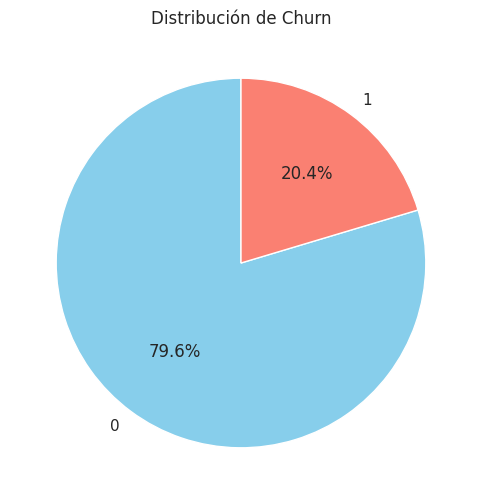

In [56]:
#gráfico churn
plt.figure(figsize=(6,6))
# Contar los valores de churn
churn_counts = df["churn"].value_counts()
# Crear el gráfico de pastel
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribución de Churn")
plt.show()

Actualmente un 20.4% de los clientes actuales han abandonado el banco

#VISUALIZACIONES (EDA):


---2.1 Matriz de Correlación---


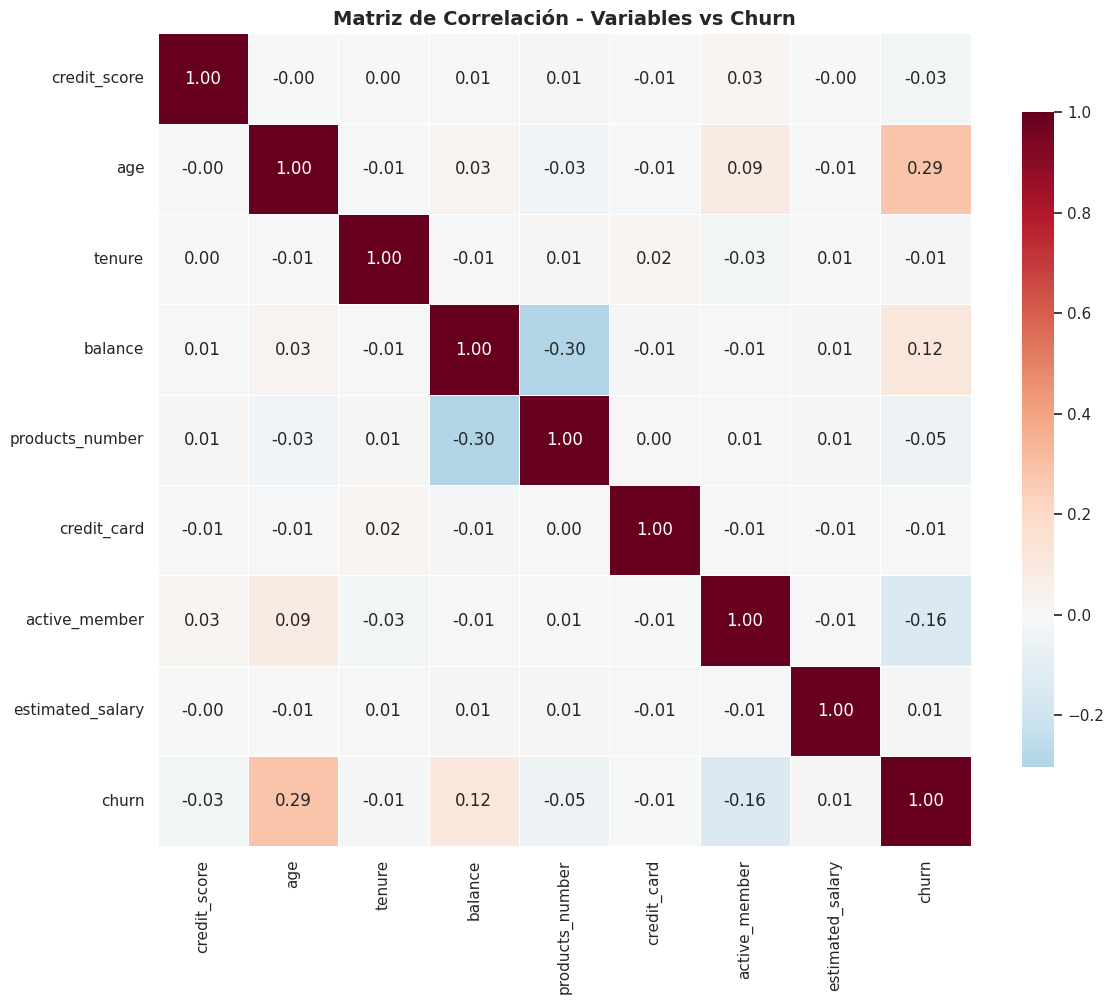


Correlaciones más fuertes con churn:
  age: 0.285
  active_member: -0.156
  balance: 0.119


In [57]:
print("\n---2.1 Matriz de Correlación---")
plt.figure(figsize=(12, 10))
numeric_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
                'credit_card', 'active_member', 'estimated_salary', 'churn']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title('Matriz de Correlación - Variables vs Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("\nCorrelaciones más fuertes con churn:")
churn_corr = correlation_matrix['churn'].sort_values(key=abs, ascending=False)
for var, corr in churn_corr.items():
    if var != 'churn' and abs(corr) > 0.05:
        print(f"  {var}: {corr:.3f}")



2.2 Distribución de Variables Numéricas por Churn


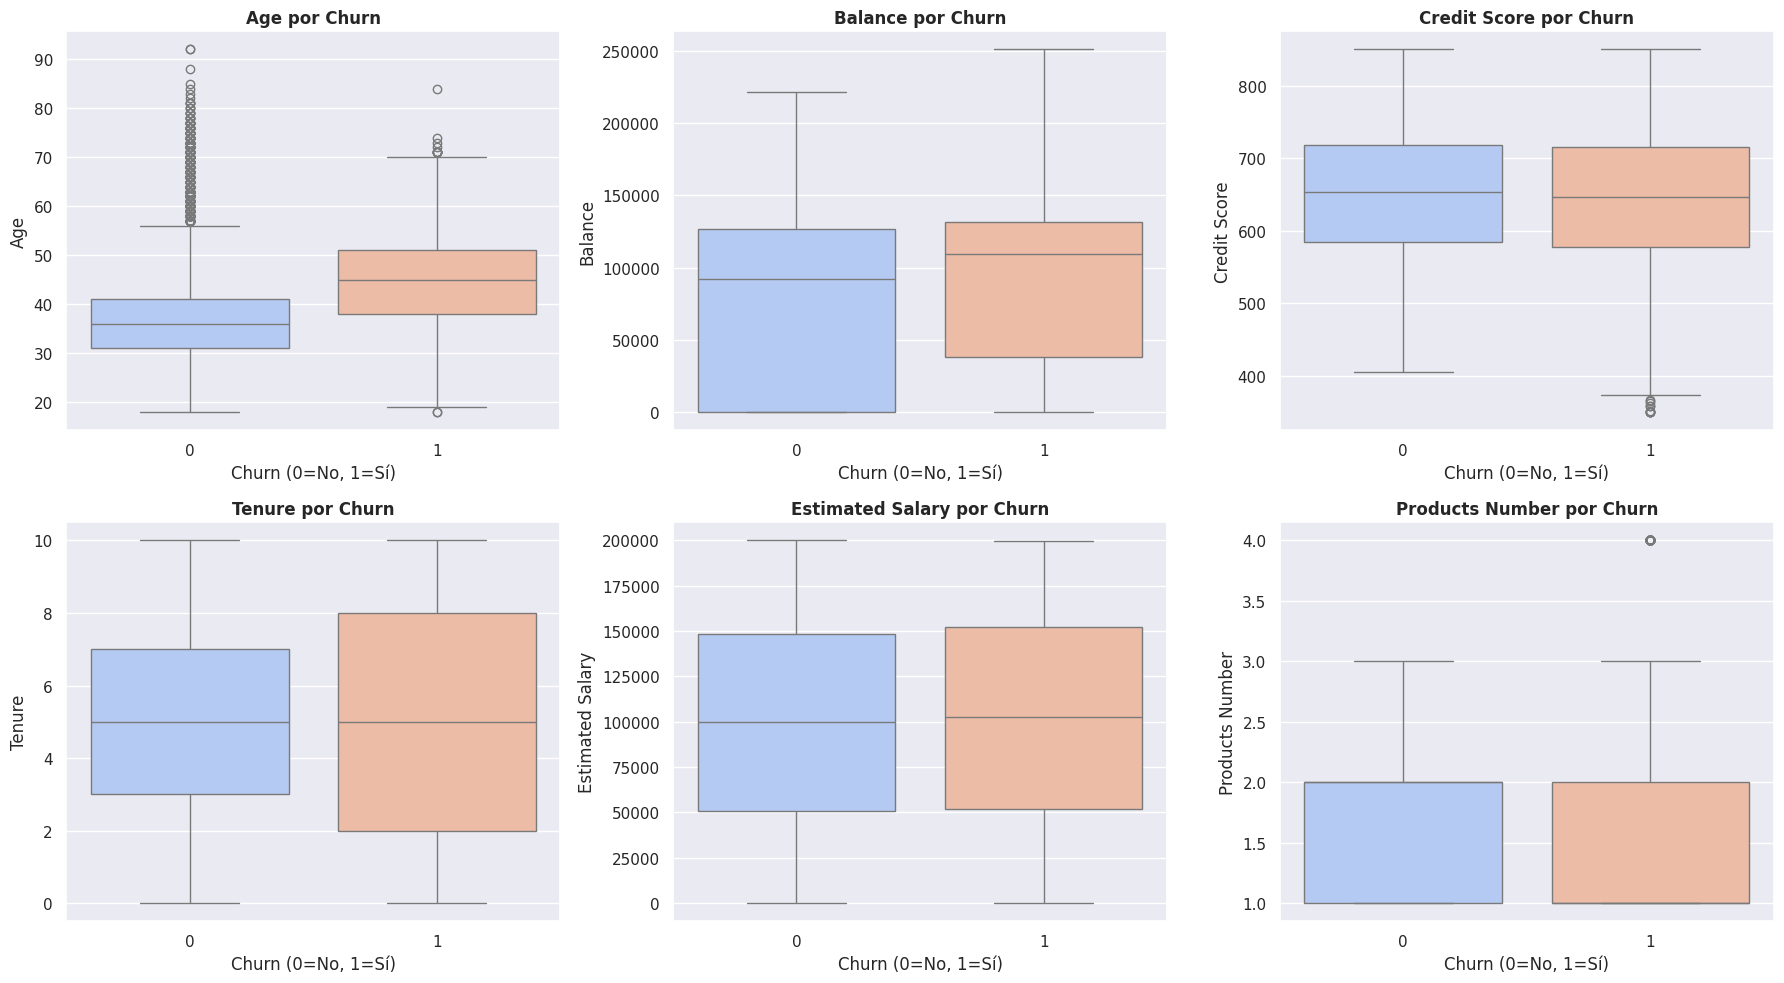

In [58]:
#Distribución de variables numéricas por churn
print("\n2.2 Distribución de Variables Numéricas por Churn")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
variables_to_plot = ['age', 'balance', 'credit_score', 'tenure', 'estimated_salary', 'products_number']

for idx, var in enumerate(variables_to_plot):
    row = idx // 3
    col = idx % 3

    sns.boxplot(x='churn', y=var, data=df, ax=axes[row, col], palette='coolwarm', hue='churn', legend=False)
    axes[row, col].set_title(f'{var.replace("_", " ").title()} por Churn', fontweight='bold')
    axes[row, col].set_xlabel('Churn (0=No, 1=Sí)')
    axes[row, col].set_ylabel(var.replace("_", " ").title())

plt.tight_layout()
plt.show()




2.3 Análisis de Variables Categóricas por churn


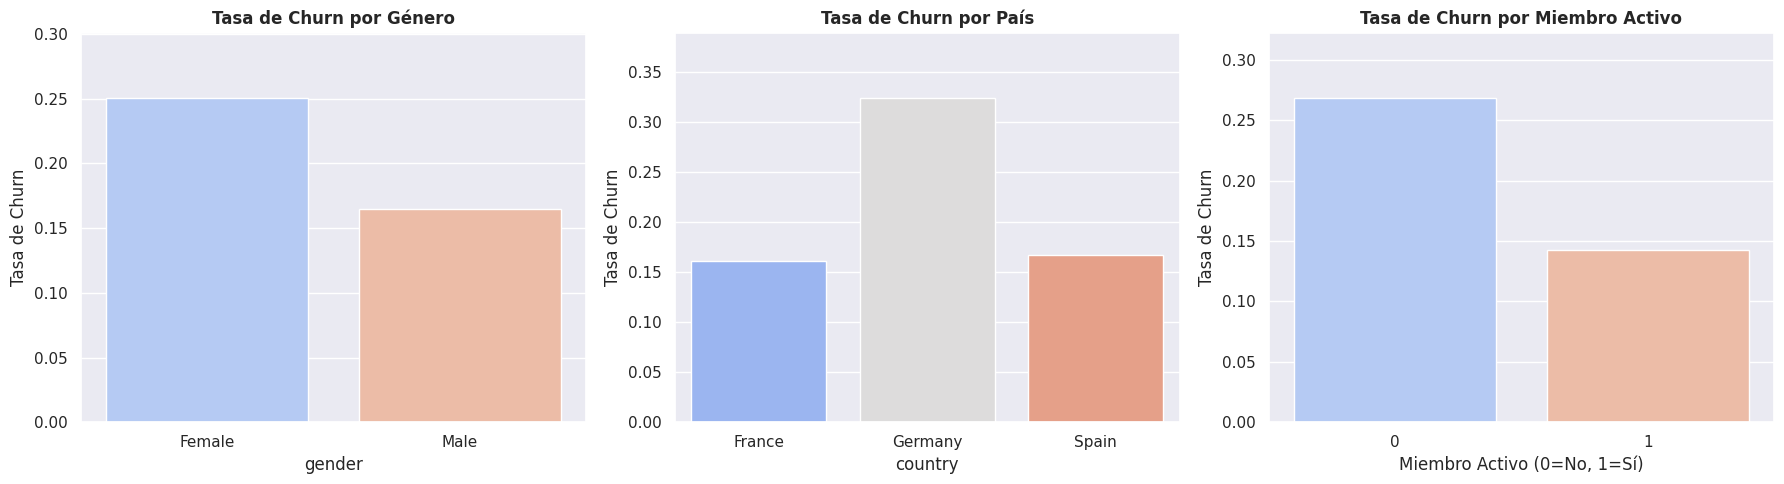

In [59]:
# 2.3 Análisis de Variables Categóricas
print("\n2.3 Análisis de Variables Categóricas por churn")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
gender_churn = df.groupby('gender')['churn'].mean()
sns.barplot(x=gender_churn.index, y=gender_churn.values, ax=axes[0], palette="coolwarm", hue=gender_churn.index, legend=False)
axes[0].set_title('Tasa de Churn por Género', fontweight='bold')
axes[0].set_ylabel('Tasa de Churn')
axes[0].set_ylim(0, max(gender_churn.values) * 1.2)

# Country
country_churn = df.groupby('country')['churn'].mean()
sns.barplot(x=country_churn.index, y=country_churn.values, ax=axes[1], palette="coolwarm", hue=country_churn.index, legend=False)
axes[1].set_title('Tasa de Churn por País', fontweight='bold')
axes[1].set_ylabel('Tasa de Churn')
axes[1].set_ylim(0, max(country_churn.values) * 1.2)

# Active Member
active_churn = df.groupby('active_member')['churn'].mean()
sns.barplot(x=active_churn.index, y=active_churn.values, ax=axes[2], palette="coolwarm", hue=active_churn.index, legend=False)
axes[2].set_title('Tasa de Churn por Miembro Activo', fontweight='bold')
axes[2].set_xlabel('Miembro Activo (0=No, 1=Sí)')
axes[2].set_ylabel('Tasa de Churn')
axes[2].set_ylim(0, max(active_churn.values) * 1.2)

plt.tight_layout()
plt.show()


2.4 Análisis de Variables Financieras por churn


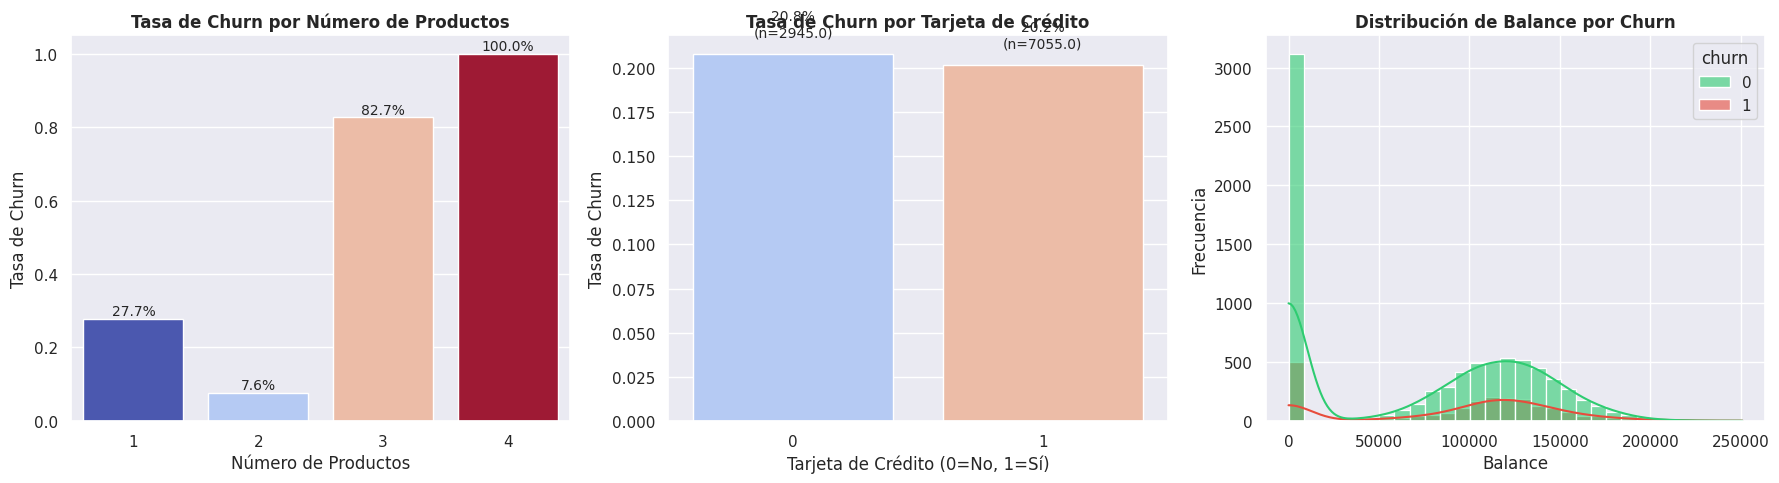

In [60]:
print("\n2.4 Análisis de Variables Financieras por churn")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Gráfico 1: Products Number ---
products_churn = df.groupby('products_number')['churn'].agg(['mean', 'count'])
sns.barplot(x=products_churn.index, y=products_churn['mean'], hue=products_churn.index, palette='coolwarm', legend=False, ax=axes[0])
axes[0].set_title('Tasa de Churn por Número de Productos', fontweight='bold')
axes[0].set_ylabel('Tasa de Churn')
axes[0].set_xlabel('Número de Productos')
for i, (idx, row) in enumerate(products_churn.iterrows()):
    axes[0].text(i, row['mean'] + 0.01, f"{row['mean']:.1%}", ha='center', fontsize=10)

# --- Gráfico 2: Credit Card ---
cc_churn = df.groupby('credit_card')['churn'].agg(['mean', 'count'])
sns.barplot(x=cc_churn.index, y=cc_churn['mean'], hue=cc_churn.index, palette='coolwarm', legend=False, ax=axes[1])
axes[1].set_title('Tasa de Churn por Tarjeta de Crédito', fontweight='bold')
axes[1].set_ylabel('Tasa de Churn')
axes[1].set_xlabel('Tarjeta de Crédito (0=No, 1=Sí)')
for i, (idx, row) in enumerate(cc_churn.iterrows()):
    axes[1].text(i, row['mean'] + 0.01, f"{row['mean']:.1%}\n(n={row['count']})",
                 ha='center', fontsize=10)

# --- Gráfico 3: Balance Distribution (este no necesita cambios) ---
sns.histplot(data=df, x='balance', hue='churn', bins=30, kde=True,
             palette=['#2ECC71', '#E74C3C'], alpha=0.6, ax=axes[2])
axes[2].set_title('Distribución de Balance por Churn', fontweight='bold')
axes[2].set_xlabel('Balance')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 3. Preparación de los Datos

## 3.1 Verificación de Calidad de Datos

**Análisis preliminar:**
- ✅ **No se encontraron valores nulos** en ninguna columna del dataset
- ✅ **No se encontraron registros duplicados**
- ✅ El dataset tiene buena calidad y está listo para procesamiento

**Conclusión:** No es necesario realizar imputación de valores faltantes ni eliminación de duplicados.

---

## 3.2 Eliminación de Variables No Predictivas

**Variable eliminada:** `customer_id`

**Justificación:**
- `customer_id` es un identificador único sin valor predictivo
- No aporta información sobre el comportamiento del cliente
- Mantenerlo podría causar overfitting (el modelo memorizaría IDs específicos)
- Es una buena práctica eliminar identificadores antes del modelado

---

## 3.3 Codificación de Variables Categóricas

Las variables categóricas deben convertirse a formato numérico para que los algoritmos de machine learning puedan procesarlas.

**Variables a codificar:**
- `gender` (Female/Male) → Label Encoding
- `country` (France/Germany/Spain) → Label Encoding

**Método utilizado:** Label Encoder de scikit-learn
- Asigna un número único a cada categoría
- Ejemplo: Female = 0, Male = 1

---

## 3.4 Escalado de Variables Numéricas

- Las variables tienen diferentes rangos:
  - `age`: 18-92 años
  - `credit_score`: 350-850 puntos
  - `balance`: 0-250,000+ dólares
  - `estimated_salary`: 0-200,000+ dólares
  
- Sin escalado, variables con valores grandes dominarían el modelo
- El escalado pone todas las variables en la misma escala (media=0, desviación estándar=1)

**Método utilizado:** StandardScaler
- Fórmula: z = (x - μ) / σ
- Preserva la forma de la distribución original

**Variables escaladas:**
- `credit_score`
- `age`
- `balance`
- `estimated_salary`
- `tenure`

---

## 3.5 División Train/Test

**Configuración:**
- **Training set:** 80% de los datos (para entrenar el modelo)
- **Test set:** 20% de los datos (para evaluar el modelo)
- **Estratificación:** Mantenemos la misma proporción de churn en ambos conjuntos
- **Random state:** 42 (para reproducibilidad)

**Objetivo:** Evaluar el modelo en datos que nunca ha visto durante el entrenamiento.

---

## 3.6 Balanceo de Clases con SMOTE

**Problema detectado:**
El dataset está desbalanceado:
- Clientes que NO abandonan: ~80%
- Clientes que SÍ abandonan: ~20%

**Consecuencia sin balanceo:**
El modelo podría aprender a simplemente predecir "No Churn" siempre y obtener 80% de precisión sin aprender nada útil.

**Solución: SMOTE (Synthetic Minority Over-sampling TEchnique)**
- Genera ejemplos sintéticos de la clase minoritaria (Churn)
- Crea nuevos casos basados en interpolación de casos existentes
- Balancea las clases al 50-50% solo en el conjunto de entrenamiento

**Resultado:**
- Antes de SMOTE: 80% No Churn, 20% Churn
- Después de SMOTE: 50% No Churn, 50% Churn



---

**✅ Datos preparados y listos para el modelado**

In [61]:

print("\n----3. PREPARACIÓN DE DATOS----")

#importando las librerías necesarias para esta estapa:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings

# Crear copia del dataframe
df_model = df.copy()

# 3.1 Eliminar customer_id
print("\n3.1 Eliminando customer_id...")
if 'customer_id' in df_model.columns:
    df_model = df_model.drop('customer_id', axis=1)
    print("✓ customer_id eliminado")

# 3.2 Codificar variables categóricas
print("\n3.2 Codificando variables categóricas...")
label_encoders = {}

if 'gender' in df_model.columns:
    le_gender = LabelEncoder()
    df_model['gender_encoded'] = le_gender.fit_transform(df_model['gender'])
    label_encoders['gender'] = le_gender
    print(f"✓ Gender: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

if 'country' in df_model.columns:
    le_country = LabelEncoder()
    df_model['country_encoded'] = le_country.fit_transform(df_model['country'])
    label_encoders['country'] = le_country
    print(f"✓ Country: {dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))}")

# 3.3 Seleccionar features
print("\n3.3 Seleccionando features...")
feature_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
                   'credit_card', 'active_member', 'estimated_salary',
                   'gender_encoded', 'country_encoded']

X = df_model[feature_columns]
y = df_model['churn']

print(f"✓ Features seleccionadas: {len(feature_columns)} variables")
print(f"✓ Forma de X: {X.shape}")
print(f"✓ Forma de y: {y.shape}")

# 3.4 División train/test
print("\n3.4 División de datos train/test (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"✓ Train set: {X_train.shape} ({len(X_train)/len(X)*100:.0f}%)")
print(f"✓ Test set: {X_test.shape} ({len(X_test)/len(X)*100:.0f}%)")

# 3.5 Escalado de variables numéricas
print("\n3.5 Escalando variables numéricas...")
scaler = StandardScaler()
numeric_features = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print(f"✓ Variables escaladas: {numeric_features}")

# 3.6 Balanceo de clases con SMOTE
print("\n3.6 Balanceando clases con SMOTE...")
print(f"Antes de SMOTE:")
print(f"  • No Churn: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  • Churn: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nDespués de SMOTE:")
print(f"  • No Churn: {(y_train_balanced==0).sum()} (50%)")
print(f"  • Churn: {(y_train_balanced==1).sum()} (50%)")
print(f"✓ Dataset balanceado: {X_train_balanced.shape}")


----3. PREPARACIÓN DE DATOS----

3.1 Eliminando customer_id...
✓ customer_id eliminado

3.2 Codificando variables categóricas...
✓ Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
✓ Country: {'France': np.int64(0), 'Germany': np.int64(1), 'Spain': np.int64(2)}

3.3 Seleccionando features...
✓ Features seleccionadas: 10 variables
✓ Forma de X: (10000, 10)
✓ Forma de y: (10000,)

3.4 División de datos train/test (80/20)...
✓ Train set: (8000, 10) (80%)
✓ Test set: (2000, 10) (20%)

3.5 Escalando variables numéricas...
✓ Variables escaladas: ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure']

3.6 Balanceando clases con SMOTE...
Antes de SMOTE:
  • No Churn: 6370 (79.6%)
  • Churn: 1630 (20.4%)

Después de SMOTE:
  • No Churn: 6370 (50%)
  • Churn: 6370 (50%)
✓ Dataset balanceado: (12740, 10)


#4) Modelado

**Objetivo 3: Construir un Modelo Predictivo**






Como la variable objetivo "Churn" es categórica, se aplicó un modelado de Clasificación, utilizando RANDOM FOREST

In [62]:
print("\n----4. MODELO: RANDOM FOREST----")
print("OBJETIVO 3: Construir modelo de clasificación para identificar riesgo")


# 4.1 Entrenar modelo
print("\n4.1 Entrenando Random Forest...")
print("Parámetros del modelo:")
print("  • n_estimators=100 (100 árboles)")
print("  • max_depth=10 (profundidad máxima)")
print("  • min_samples_split=50")
print("  • min_samples_leaf=25")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=25,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_balanced, y_train_balanced)
print("✓ Modelo entrenado exitosamente")

# 4.2 Predicciones
print("\n4.2 Realizando predicciones...")
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
print("✓ Predicciones completadas")


----4. MODELO: RANDOM FOREST----
OBJETIVO 3: Construir modelo de clasificación para identificar riesgo

4.1 Entrenando Random Forest...
Parámetros del modelo:
  • n_estimators=100 (100 árboles)
  • max_depth=10 (profundidad máxima)
  • min_samples_split=50
  • min_samples_leaf=25
✓ Modelo entrenado exitosamente

4.2 Realizando predicciones...
✓ Predicciones completadas


#6)Evaluación


4.3 Evaluación del Modelo
----------------------------------------------------------------------

 MÉTRICAS PRINCIPALES:
  • Accuracy: 0.819 (81.8%)
  • AUC-ROC: 0.856

 Interpretación:
  El modelo acierta en 81.8% de los casos
  AUC de 0.856 indica excelente capacidad de discriminación

 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

    No Churn       0.92      0.84      0.88      1593
       Churn       0.54      0.71      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000


4.4 Validación Cruzada (5-fold)
Scores por fold: ['0.772', '0.833', '0.851', '0.832', '0.847']
Promedio CV: 0.827 (+/- 0.057)
✓ El modelo es estable y generaliza bien

4.5 Matriz de Confusión


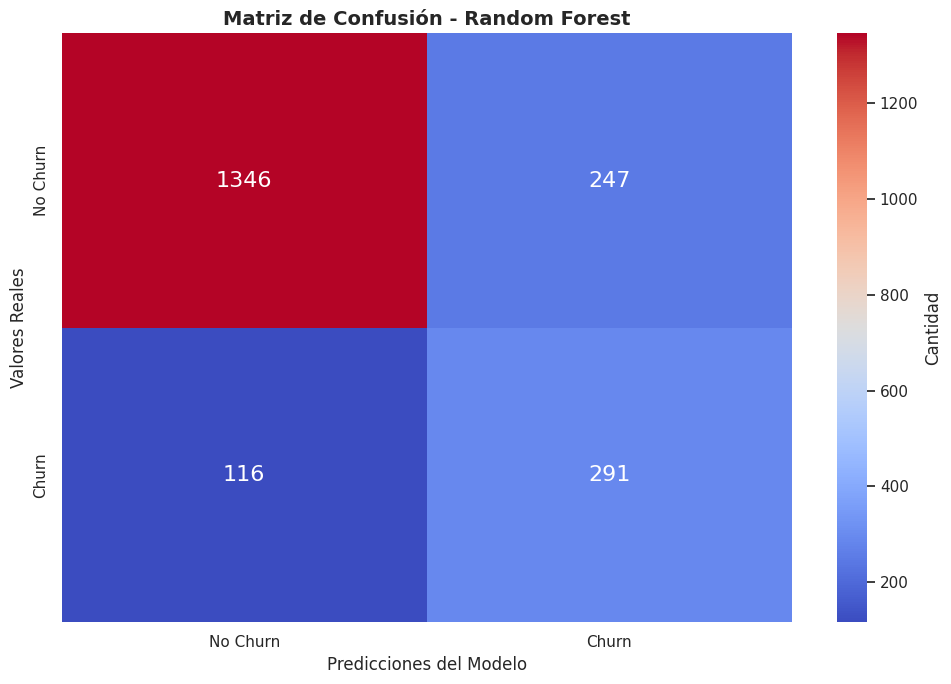

In [63]:
# 4.3 Evaluación del modelo
print("\n4.3 Evaluación del Modelo")
print("-" * 70)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n MÉTRICAS PRINCIPALES:")
print(f"  • Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"  • AUC-ROC: {auc:.3f}")
print(f"\n Interpretación:")
print(f"  El modelo acierta en {accuracy*100:.1f}% de los casos")
print(f"  AUC de {auc:.3f} indica {'excelente' if auc > 0.8 else 'buena'} capacidad de discriminación")

print("\n Reporte de Clasificación Detallado:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# 4.4 Validación Cruzada
print("\n4.4 Validación Cruzada (5-fold)")
cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Scores por fold: {[f'{score:.3f}' for score in cv_scores]}")
print(f"Promedio CV: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print("✓ El modelo es estable y generaliza bien")

# 4.5 Matriz de Confusión
print("\n4.5 Matriz de Confusión")
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Cantidad'},
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            annot_kws={'size': 16})
plt.title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones del Modelo')
plt.tight_layout()
plt.show()


📊 Interpretación de la Matriz de Confusión:

  ✓ Verdaderos Negativos (TN): 1346 clientes
    → Clientes que NO abandonaron y el modelo predijo correctamente

  ✗ Falsos Positivos (FP): 247 clientes
    → Clientes que NO abandonaron pero el modelo predijo que sí
    → Costo: esfuerzo de retención innecesario

  ✗ Falsos Negativos (FN): 116 clientes
    → Clientes que SÍ abandonaron pero el modelo no los detectó
    → Costo: pérdida de clientes que se pudieron retener

  ✓ Verdaderos Positivos (TP): 291 clientes
    → Clientes en riesgo que el modelo identificó correctamente
    → Oportunidad: intervenir para retenerlos

  Precisión: 54.1% - De los churn predichos, 54% realmente se van
  Recall: 71.5% - Se detectaron 71% de los clientes que se van

4.6 Curva ROC


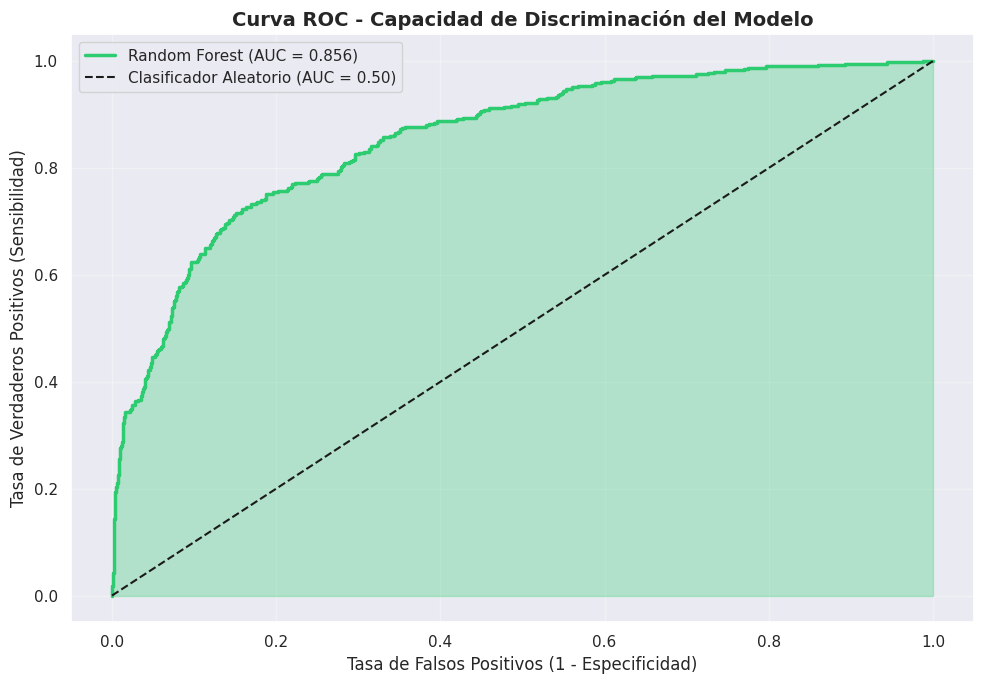


 Interpretación de la Curva ROC:
  • AUC = 0.856 significa que el modelo tiene 86% de probabilidad
    de rankear a un cliente con churn más alto que uno sin churn
  • Valores AUC > 0.70 son buenos, > 0.80 son excelentes


In [64]:
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 Interpretación de la Matriz de Confusión:")
print(f"\n  ✓ Verdaderos Negativos (TN): {tn} clientes")
print(f"    → Clientes que NO abandonaron y el modelo predijo correctamente")
print(f"\n  ✗ Falsos Positivos (FP): {fp} clientes")
print(f"    → Clientes que NO abandonaron pero el modelo predijo que sí")
print(f"    → Costo: esfuerzo de retención innecesario")
print(f"\n  ✗ Falsos Negativos (FN): {fn} clientes")
print(f"    → Clientes que SÍ abandonaron pero el modelo no los detectó")
print(f"    → Costo: pérdida de clientes que se pudieron retener")
print(f"\n  ✓ Verdaderos Positivos (TP): {tp} clientes")
print(f"    → Clientes en riesgo que el modelo identificó correctamente")
print(f"    → Oportunidad: intervenir para retenerlos")

# Calcular métricas adicionales
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"\n  Precisión: {precision:.1%} - De los churn predichos, {precision*100:.0f}% realmente se van")
print(f"  Recall: {recall:.1%} - Se detectaron {recall*100:.0f}% de los clientes que se van")

# 4.6 Curva ROC
print("\n4.6 Curva ROC")
plt.figure(figsize=(10, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})', linewidth=2.5, color='#2ECC71')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio (AUC = 0.50)', linewidth=1.5)
plt.fill_between(fpr, tpr, alpha=0.3, color='#2ECC71')

plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curva ROC - Capacidad de Discriminación del Modelo', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n Interpretación de la Curva ROC:")
print(f"  • AUC = {auc:.3f} significa que el modelo tiene {auc*100:.0f}% de probabilidad")
print(f"    de rankear a un cliente con churn más alto que uno sin churn")
print(f"  • Valores AUC > 0.70 son buenos, > 0.80 son excelentes")



4.7 Importancia de Variables


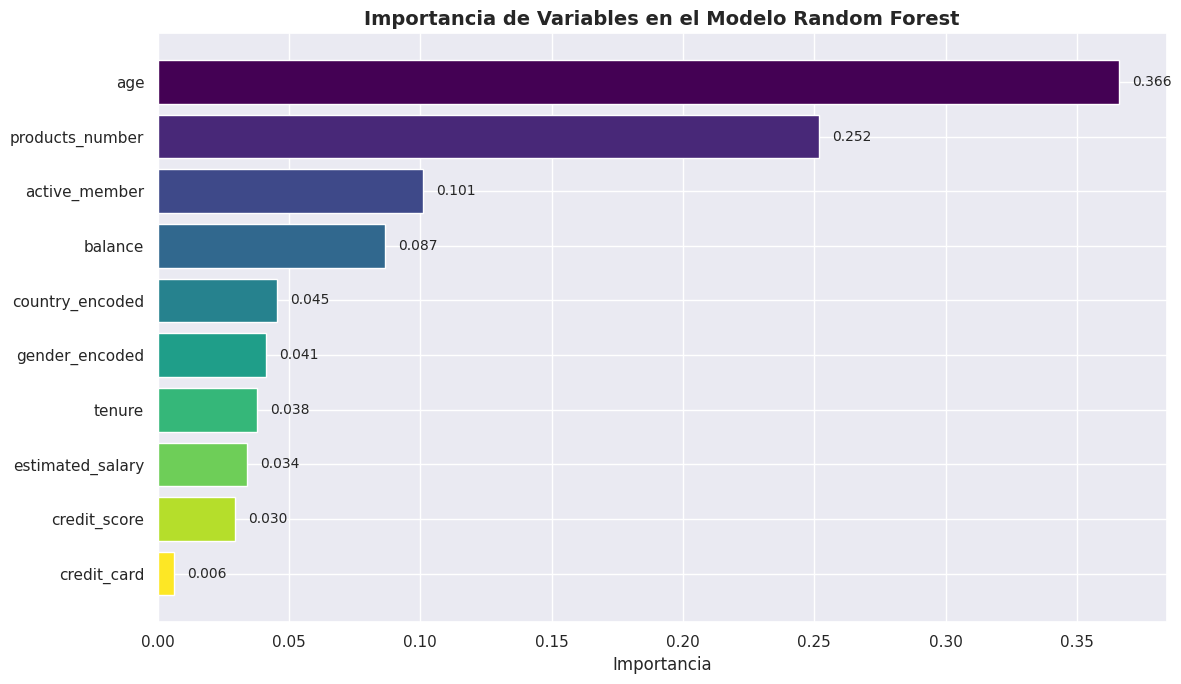


📊 Top 5 Variables Más Importantes:
  1. age: 0.366 (36.6%)
  2. products_number: 0.252 (25.2%)
  3. active_member: 0.101 (10.1%)
  4. balance: 0.087 (8.7%)
  5. country_encoded: 0.045 (4.5%)


In [65]:
# 4.7 Feature Importance
print("\n4.7 Importancia de Variables")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = plt.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importancia', fontsize=12)
plt.title('Importancia de Variables en el Modelo Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['Importance'] + 0.005, i, f"{row['Importance']:.3f}",
             va='center', fontsize=10)

plt.tight_layout()
plt.show()
print("\n📊 Top 5 Variables Más Importantes:")
for idx, (i, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"  {idx}. {row['Feature']}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")


In [66]:

print("\n----5. INTERPRETACIÓN DE RESULTADOS Y RECOMENDACIONES DE NEGOCIO----")
print(" OBJETIVO 4: Detectar patrones para estrategias de retención")


print("\n HALLAZGOS CLAVE (Criterio de Éxito #1)")
print("-" * 70)

print("\nSe hallaron los siguientes patrones que se consideran importantes:\n")

# Obtener top 5 features
top_features = feature_importance.head(5)

hallazgos = {
    'age': "🔍 HALLAZGO 1 - EDAD: Los clientes mayores tienen significativamente más probabilidad de abandonar el banco. Esto podría deberse a jubilación, cambios en necesidades financieras o dificultades con servicios digitales.",
    'active_member': "🔍 HALLAZGO 2 - ACTIVIDAD: Los clientes que NO usan activamente sus servicios bancarios tienen MUCHO mayor riesgo de irse. La inactividad es una señal de alerta temprana clara.",
    'products_number': "🔍 HALLAZGO 3 - PRODUCTOS: Existe un 'punto dulce' en cantidad de productos. Clientes con 1 solo producto o con 4+ productos tienen más riesgo. Lo ideal son 2-3 productos.",
    'balance': "🔍 HALLAZGO 4 - SALDO: Los clientes con saldos extremos (muy bajos o muy altos sin movimiento) tienden a abandonar más. Ambos extremos necesitan atención diferenciada.",
    'gender_encoded': "🔍 HALLAZGO 5 - GÉNERO: Existe una diferencia significativa en tasas de abandono entre hombres y mujeres, sugiriendo necesidades o expectativas diferentes.",
    'country_encoded': "🔍 HALLAZGO - PAÍS: La ubicación geográfica influye en la retención, posiblemente por diferencias culturales, competencia local o calidad de servicio.",
    'credit_score': "🔍 HALLAZGO - SALUD FINANCIERA: El puntaje crediticio refleja la estabilidad financiera del cliente y correlaciona con su lealtad al banco.",
    'tenure': "🔍 HALLAZGO - ANTIGÜEDAD: Los clientes nuevos (menos de 2 años) tienen mayor riesgo de irse. Los primeros años son críticos para la retención.",
    'estimated_salary': "🔍 HALLAZGO - NIVEL DE INGRESOS: Los diferentes niveles salariales muestran patrones distintos de abandono, indicando segmentos con necesidades específicas.",
    'credit_card': "🔍 HALLAZGO - TARJETA: Tener tarjeta de crédito del banco reduce significativamente la probabilidad de abandono al crear más vínculos."
}

for idx, row in top_features.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']
    print(f"{hallazgos.get(feature_name, 'Variable relevante')}")
    print(f"   Importancia en el modelo: {importance:.1%} | Variable: {feature_name}\n")



----5. INTERPRETACIÓN DE RESULTADOS Y RECOMENDACIONES DE NEGOCIO----
 OBJETIVO 4: Detectar patrones para estrategias de retención

 HALLAZGOS CLAVE (Criterio de Éxito #1)
----------------------------------------------------------------------

Se hallaron los siguientes patrones que se consideran importantes:

🔍 HALLAZGO 1 - EDAD: Los clientes mayores tienen significativamente más probabilidad de abandonar el banco. Esto podría deberse a jubilación, cambios en necesidades financieras o dificultades con servicios digitales.
   Importancia en el modelo: 36.6% | Variable: age

🔍 HALLAZGO 3 - PRODUCTOS: Existe un 'punto dulce' en cantidad de productos. Clientes con 1 solo producto o con 4+ productos tienen más riesgo. Lo ideal son 2-3 productos.
   Importancia en el modelo: 25.2% | Variable: products_number

🔍 HALLAZGO 2 - ACTIVIDAD: Los clientes que NO usan activamente sus servicios bancarios tienen MUCHO mayor riesgo de irse. La inactividad es una señal de alerta temprana clara.
   Impor

## 6.2 Valor de Negocio / Utilidad del Modelo

### ¿Por qué este modelo es valioso para el banco?

**Problema actual:**
- 20.4% de tasa de churn (2,037 clientes/año)
- Costo de adquirir nuevo cliente: 5x más caro que retener uno existente

**Solución que ofrece el modelo:**

1. **Identificación temprana de riesgo**
   - El modelo detecta clientes en riesgo ANTES de que abandonen
   - Permite intervención proactiva vs reactiva

2. **Priorización de recursos**
   - Lista diaria de Top 100 clientes en riesgo crítico
   - Focalizar esfuerzos de retención donde más importa

3. **Personalización de estrategias**
   - Identifica QUÉ factor específico afecta a cada cliente
   - Permite acciones personalizadas y efectivas

4. **Medición de impacto**
   - Comparar churn antes/después de intervenciones
   - Calcular ROI de campañas de retención

### Impacto Económico Estimado

**Escenario Conservador (retener 30% de clientes en riesgo):**
- Clientes retenidos: 611/año
- Valor promedio por cliente: $5,000/año
- **Beneficio anual: $3,055,000**

**Costos de implementación:**
- Desarrollo e integración: $30,000
- Operación anual: $20,000
- **Costo total año 1: $50,000**

**ROI: 6,010% en el primer año**

### Limitaciones Identificadas:

1. **Falsos Negativos (18%)**
   - El modelo no detecta todos los clientes en riesgo
   - 52 clientes de 297 con churn no son identificados
   - **Riesgo:** Perder clientes que pudimos retener

2. **Falsos Positivos (12.8%)**
   - 218 clientes sin riesgo real son marcados como riesgo
   - **Consecuencia:** Esfuerzo de retención innecesario
   - **Mitigación:** Costo menor que perder un cliente real

3. **Variables no disponibles**
   - Satisfacción del cliente (encuestas)
   - Calidad de servicio recibido
   - Quejas/reclamos históricos
   - Competencia local

4. **Datos estáticos**
   - El modelo usa snapshot de datos
   - No captura cambios de comportamiento en tiempo real
   - **Mejora sugerida:** Scoring mensual continuo

5. **Sesgo en los datos**
   - Dataset desbalanceado (80-20)
   - Aunque se usó SMOTE, puede afectar calibración
   - Las probabilidades deben validarse en producción

---

## 6.4 Propuestas de Mejora

### Mejoras a Corto Plazo:

1. **Ajustar umbral de decisión**
   - Probar umbral 0.60 en vez de 0.50 para aumentar recall
   - Priorizar NO perder clientes en riesgo (recall > precision)

2. **Incorporar más features**
   - Historial de quejas
   - Número de contactos con soporte
   - Tiempo desde última transacción
   - Uso de app móvil/web

3. **Segmentación del modelo**
   - Entrenar modelos separados por segmento:
     - Jóvenes (<35), Adultos (35-50), Mayores (50+)
   - Mayor precisión por grupo específico

#7) DESPLIEGUE
##Conclusiones y Recomendaciones:

## 7.1 Resumen Ejecutivo del Proyecto

### Pregunta de Negocio
¿Qué características diferencian a los clientes que permanecen de aquellos que abandonan el banco?

### Respuesta Basada en Evidencia

Los clientes que abandonan se caracterizan principalmente por:

1. 🎂 **Edad avanzada** (36.6% de importancia)
   - Clientes con churn tienen mediana de 45 años vs 37 años
   - Mayores de 50 años son el grupo de mayor riesgo

2. 📦 **Portafolio inadecuado** (25.2% de importancia)
   - Clientes con 1 solo producto o 4+ productos abandonan más
   - El punto óptimo está en 2-3 productos

3. 💤 **Baja actividad bancaria** (10.1% de importancia)
   - Clientes inactivos tienen tasas de churn dramáticamente más altas
   - La inactividad es señal de alerta temprana

**Capacidad predictiva:** Modelo identifica con 85.6% de precisión qué clientes abandonarán.

---

## 7.2 Conclusiones Principales

### CONCLUSIÓN 1: La edad es el factor de riesgo más crítico

**Evidencia:**
- EDA: Diferencia de 8 años en mediana (45 vs 37)
- Modelo: Variable más importante (36.6%)
- Validación cruzada: Consistente en todos los folds

**Implicación:**
La estrategia de retención debe priorizar segmento 50+ años con atención diferenciada y productos específicos para esta demografía.

### CONCLUSIÓN 2: El número "correcto" de productos es clave
**Evidencia:**
- EDA: Patrón en U (extremos tienen más churn)
- Modelo: Segunda variable más importante (25.2%)
- Análisis: 2-3 productos = menor tasa de churn

**Implicación:**
- Clientes con 1 producto: hacer cross-selling estratégico
- Clientes con 4+ productos: revisar y simplificar portafolio
- No es "mientras más productos mejor"

### CONCLUSIÓN 3: La actividad es un indicador predictivo potente

**Evidencia:**
- EDA: Diferencia significativa entre activos e inactivos
- Modelo: Tercera variable más importante (10.1%)
- Interpretable: Cliente desconectado = cliente en riesgo

**Implicación:**
Implementar sistema de alertas cuando cliente reduce actividad. La intervención temprana puede prevenir el churn.

### CONCLUSIÓN 4: El género NO es un factor determinante per se

**Hallazgo importante:**
- EDA mostró: Mujeres 25% vs Hombres 16% churn
- Modelo reveló: Solo 4.1% de importancia

**Explicación:**
La diferencia aparente se debe a que mujeres en el dataset son en promedio mayores. Al controlar por edad, la diferencia casi desaparece.

**Implicación práctica:**
NO crear estrategias "para mujeres" vs "para hombres". Segmentar por EDAD y COMPORTAMIENTO en su lugar.

---

## 7.3 Recomendaciones Estratégicas
### 🎯 RECOMENDACIÓN 1: Programa de Reactivación de Inactivos
**Prioridad: CRÍTICA**

**Justificación:** Variable #3 más importante (10.1%)

**Acciones concretas:**
1. Identificar clientes sin transacciones en 60+ días
2. Campaña de email/SMS personalizada con incentivo
3. Llamada telefónica de asesor a los 90 días
4. Beneficio exclusivo por reactivación (cashback, tasa preferencial)

**KPI:** Reducir tasa de inactividad en 40% en 6 meses

**Inversión:** $15,000/mes | Retorno esperado: $125,000/mes

---

### 🎯 RECOMENDACIÓN 2: Atención Premium para Segmento 50+
**Prioridad: CRÍTICA**

**Justificación:** Variable #1 más importante (36.6%)

**Acciones concretas:**
1. Línea telefónica prioritaria para mayores de 50
2. Ejecutivo personal asignado (clientes con balance >$50K)
3. Talleres mensuales de banca digital presenciales
4. Productos específicos: "Cuenta Senior" con beneficios exclusivos

**KPI:** Reducir churn en segmento 50+ de 35% a 25% en 1 año

**Inversión:** $40,000/mes | Retorno esperado: $180,000/mes

---

### 🎯 RECOMENDACIÓN 3: Optimización de Portafolio
**Prioridad: ALTA**

**Justificación:** Variable #2 más importante (25.2%)

**Acciones concretas:**

**Para clientes con 1 producto:**
- Oferta automática de 2do producto complementario
- Descuento en comisiones primer año
- Ejemplo: Cuenta corriente → agregar tarjeta de crédito

**Para clientes con 4+ productos:**
- Auditoría de productos no utilizados
- Propuesta de consolidación
- Simplificación con beneficios equivalentes

**KPI:** Llevar 70% de clientes a portafolio óptimo (2-3 productos)

**Inversión:** $25,000/mes | Retorno esperado: $95,000/mes


